### Notebook for the cell proportion analysis of Healthy_vs_COPD CTRL_vs_IAV data

- **Developed by**: Carlos Talavera-López Ph.D
- **Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 231204
- **Last modified**: 231204

### Load required packages

In [1]:
import milopy
import numpy as np
import pandas as pd
import scanpy as sc
import milopy.core as milo
import matplotlib.pyplot as plt

### Set up working environment

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.3
scanpy      1.9.6
-----
PIL                 10.1.0
appnope             0.1.3
asttokens           NA
cffi                1.16.0
comm                0.2.0
cycler              0.12.1
cython_runtime      NA
dateutil            2.8.2
debugpy             1.8.0
decorator           5.1.1
exceptiongroup      1.2.0
executing           2.0.1
get_annotations     NA
h5py                3.10.0
importlib_resources NA
ipykernel           6.27.1
ipywidgets          8.1.1
jedi                0.19.1
jinja2              3.1.2
joblib              1.3.2
kiwisolver          1.4.5
llvmlite            0.41.1
markupsafe          2.1.3
matplotlib          3.8.2
milopy              0.1.1
mpl_toolkits        NA
natsort             8.4.0
numba               0.58.1
numpy               1.26.2
packaging           23.2
pandas              2.1.3
parso               0.8.3
patsy               0.5.4
pexpect             4.9.0
platformdirs        4.0.0
prompt_toolkit      3.0.41
psutil              5

### Load working object

In [3]:
adata = sc.read_h5ad('../../../data/Marburg_cell_states_locked_scANVI_ctl230901.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

In [10]:
adata.obs['batch'].cat.categories

Index(['CHE01_CTRL', 'CHE01_IAV', 'CHE02_CTRL', 'CHE02_IAV', 'CHE03_CTRL',
       'CHE03_IAV', 'CSE03_CTRL', 'CSE03_IAV', 'CSE_06_CRTL', 'CSE_06_IAV',
       'GER02_CTRL', 'GER02_IAV', 'GER12_CTRL', 'GER12_IAV', 'GER14_CRTL',
       'GER14_IAV', 'GnR08_CTRL', 'GnR08_IAV', 'GnR_07_CTRL', 'GnR_07_IAV',
       'ST07_CSE_CTRL', 'ST08_GnR_CTRL', 'ST09_CSE_IAV', 'ST10_GnR_IAV'],
      dtype='object')

### Build k-NN graph

In [5]:
sc.pp.neighbors(adata, n_neighbors = 50, random_state = 1712, use_rep = 'X_scANVI')

computing neighbors


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:22)


### Construct neighbourhoods a lá `milo`

In [6]:
milo.make_nhoods(adata)
adata.obsm["nhoods"]

/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/milopy/core.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.8311615  2.13054061 1.79336369 ... 2.08682775 2.41892886 2.46359062]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  adata.obs.loc[adata.obs["nhood_ixs_refined"]


<97573x7493 sparse matrix of type '<class 'numpy.float32'>'
	with 790863 stored elements in Compressed Sparse Row format>

In [7]:
adata[adata.obs['nhood_ixs_refined'] != 0].obs[['nhood_ixs_refined', 'nhood_kth_distance']]

,nhood_ixs_refined,nhood_kth_distance
9737154-CSE_06_CRTL-V2,1,1.831161
4595019-CSE_06_CRTL-V2,1,2.130541
12541494-CSE_06_CRTL-V2,1,1.793364
10046995-CSE_06_CRTL-V2,1,1.821095
610996-CSE_06_CRTL-V2,1,2.212514
...,...,...
9020180-CSE03_IAV-V6,1,2.200487
2665781-CSE03_IAV-V6,1,2.492664
14041734-CSE03_IAV-V6,1,2.086828
1631627-CSE03_IAV-V6,1,2.418929


(array([  5.,  15.,  13.,  24.,  51.,  83.,  84.,  92., 124., 126., 163.,
        146., 167., 191., 220., 202., 223., 241., 192., 238., 225., 225.,
        219., 231., 212., 212., 190., 197., 197., 166., 198., 158., 175.,
        158., 146., 125., 128., 116., 108., 121., 112., 118.,  85.,  75.,
         95.,  71.,  64.,  81.,  67.,  39.,  46.,  39.,  39.,  32.,  34.,
         33.,  41.,  31.,  26.,  22.,  29.,  13.,  21.,  19.,  11.,  10.,
         18.,  14.,  14.,  12.,  10.,   9.,   8.,   6.,   3.,   2.,   2.,
          7.,   4.,   2.,   5.,   1.,   4.,   1.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          2.]),
 array([ 50.        ,  52.00999832,  54.02000046,  56.02999878,
         58.04000092,  60.04999924,  62.06000137,  64.06999969,
         66.08000183,  68.08999634,  70.09999847,  72.11000061,
         74.12000275,  76.12999725,  78.13999939,  80.15000153,
         82.16000366,  84.16999817,  86.18000031,  88.19000244

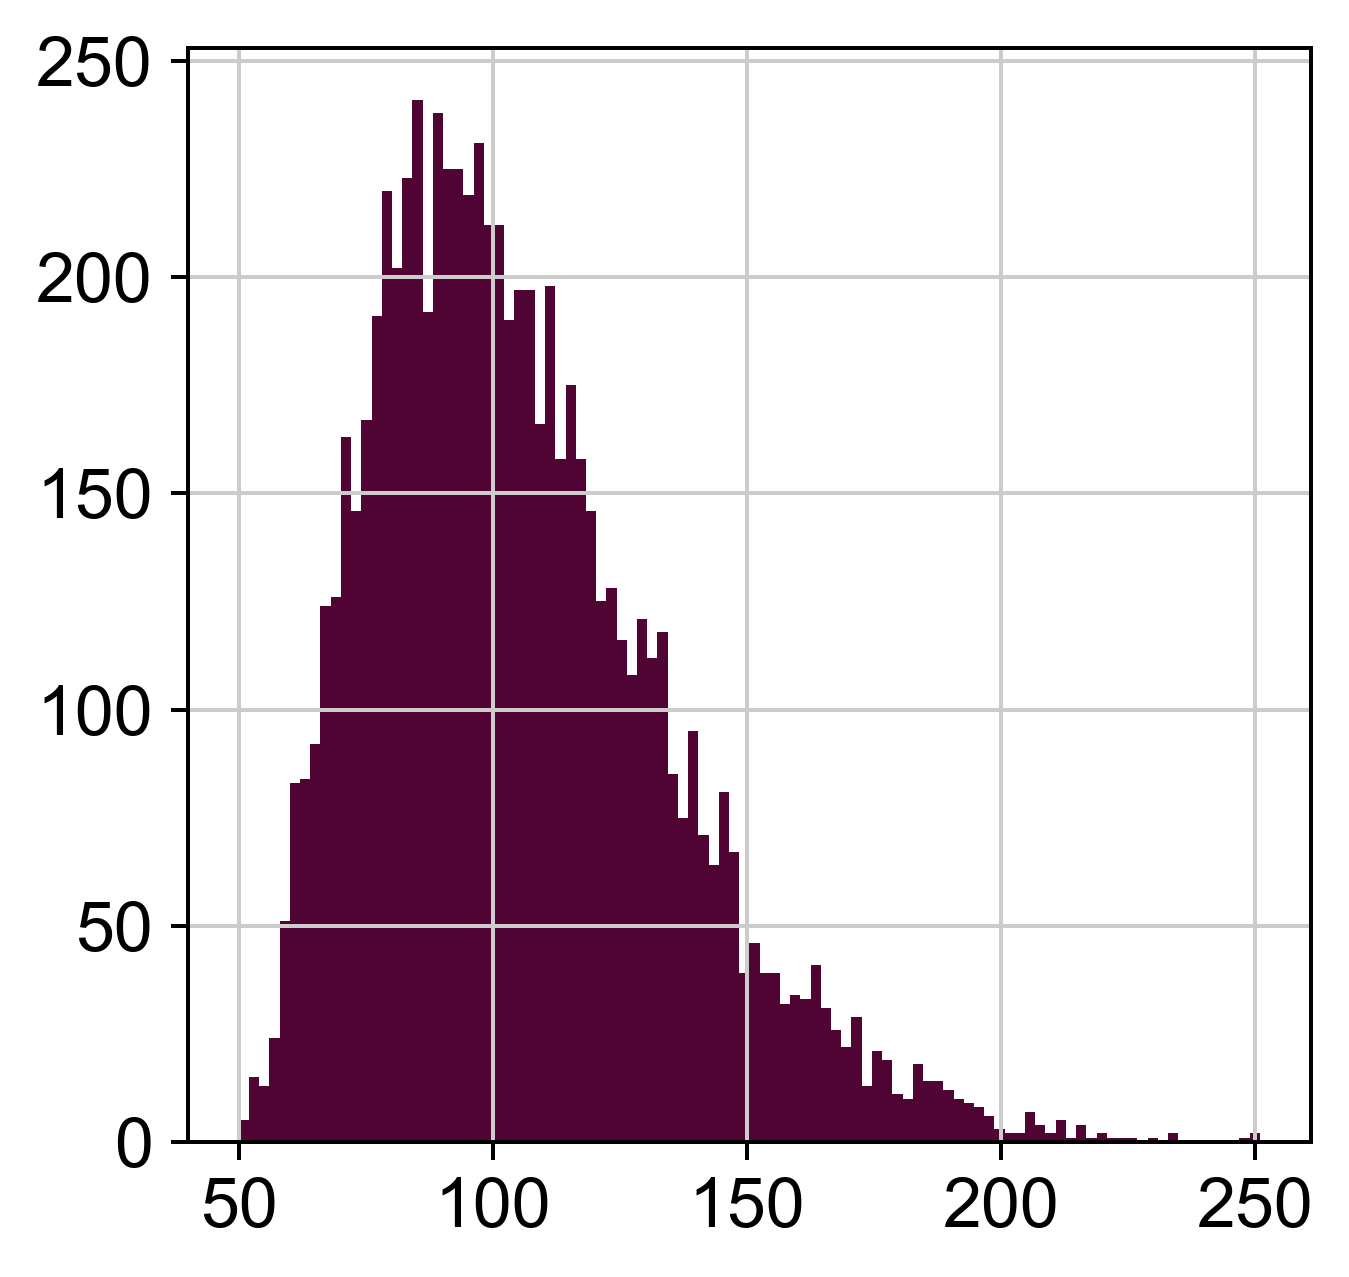

In [8]:
nhood_size = np.array(adata.obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins = 100, color = '#4F0433')

### Count cells in neighbourhoods

In [11]:
milo.count_nhoods(adata, sample_col = "batch")
adata.uns["nhood_adata"]

AnnData object with n_obs × n_vars = 7493 × 24
    obs: 'index_cell', 'kth_distance'
    uns: 'sample_col'

### Differential abundance testing with GLM

In [13]:
milo.DA_nhoods(adata, design = "~ group")
adata.uns["nhood_adata"].obs

/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/milopy/core.py:239: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if design_df.dtypes[i].name == 'category':
/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/milopy/core.py:311: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalues = pvalues[keep_nhoods][o]
/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/milopy/core.py:312: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

,index_cell,kth_distance,SpatialFDR,logFC,logCPM,F,PValue,FDR
0,9737154-CSE_06_CRTL-V2,1.831161,0.062652,-3.055973,7.679673,5.406037,0.021045,0.059597
1,4595019-CSE_06_CRTL-V2,2.130541,0.362133,-1.470694,7.368995,1.522557,0.218645,0.355768
2,12541494-CSE_06_CRTL-V2,1.793364,0.002323,-5.783091,7.365784,13.211266,0.000354,0.002159
3,10046995-CSE_06_CRTL-V2,1.821095,0.001242,-6.440820,7.659629,15.421440,0.000118,0.001150
4,610996-CSE_06_CRTL-V2,2.212514,0.351126,-1.476155,7.353696,1.587239,0.209153,0.344815
...,...,...,...,...,...,...,...,...
7488,9020180-CSE03_IAV-V6,2.200487,0.001175,6.396988,7.488569,16.847751,0.000059,0.001081
7489,2665781-CSE03_IAV-V6,2.492664,0.006086,4.511912,7.246163,10.760232,0.001219,0.005671
7490,14041734-CSE03_IAV-V6,2.086828,0.001893,5.572980,7.801027,13.800136,0.000262,0.001758
7491,1631627-CSE03_IAV-V6,2.418929,0.009700,4.293691,7.763900,9.625893,0.002189,0.009055


- Evaluate results

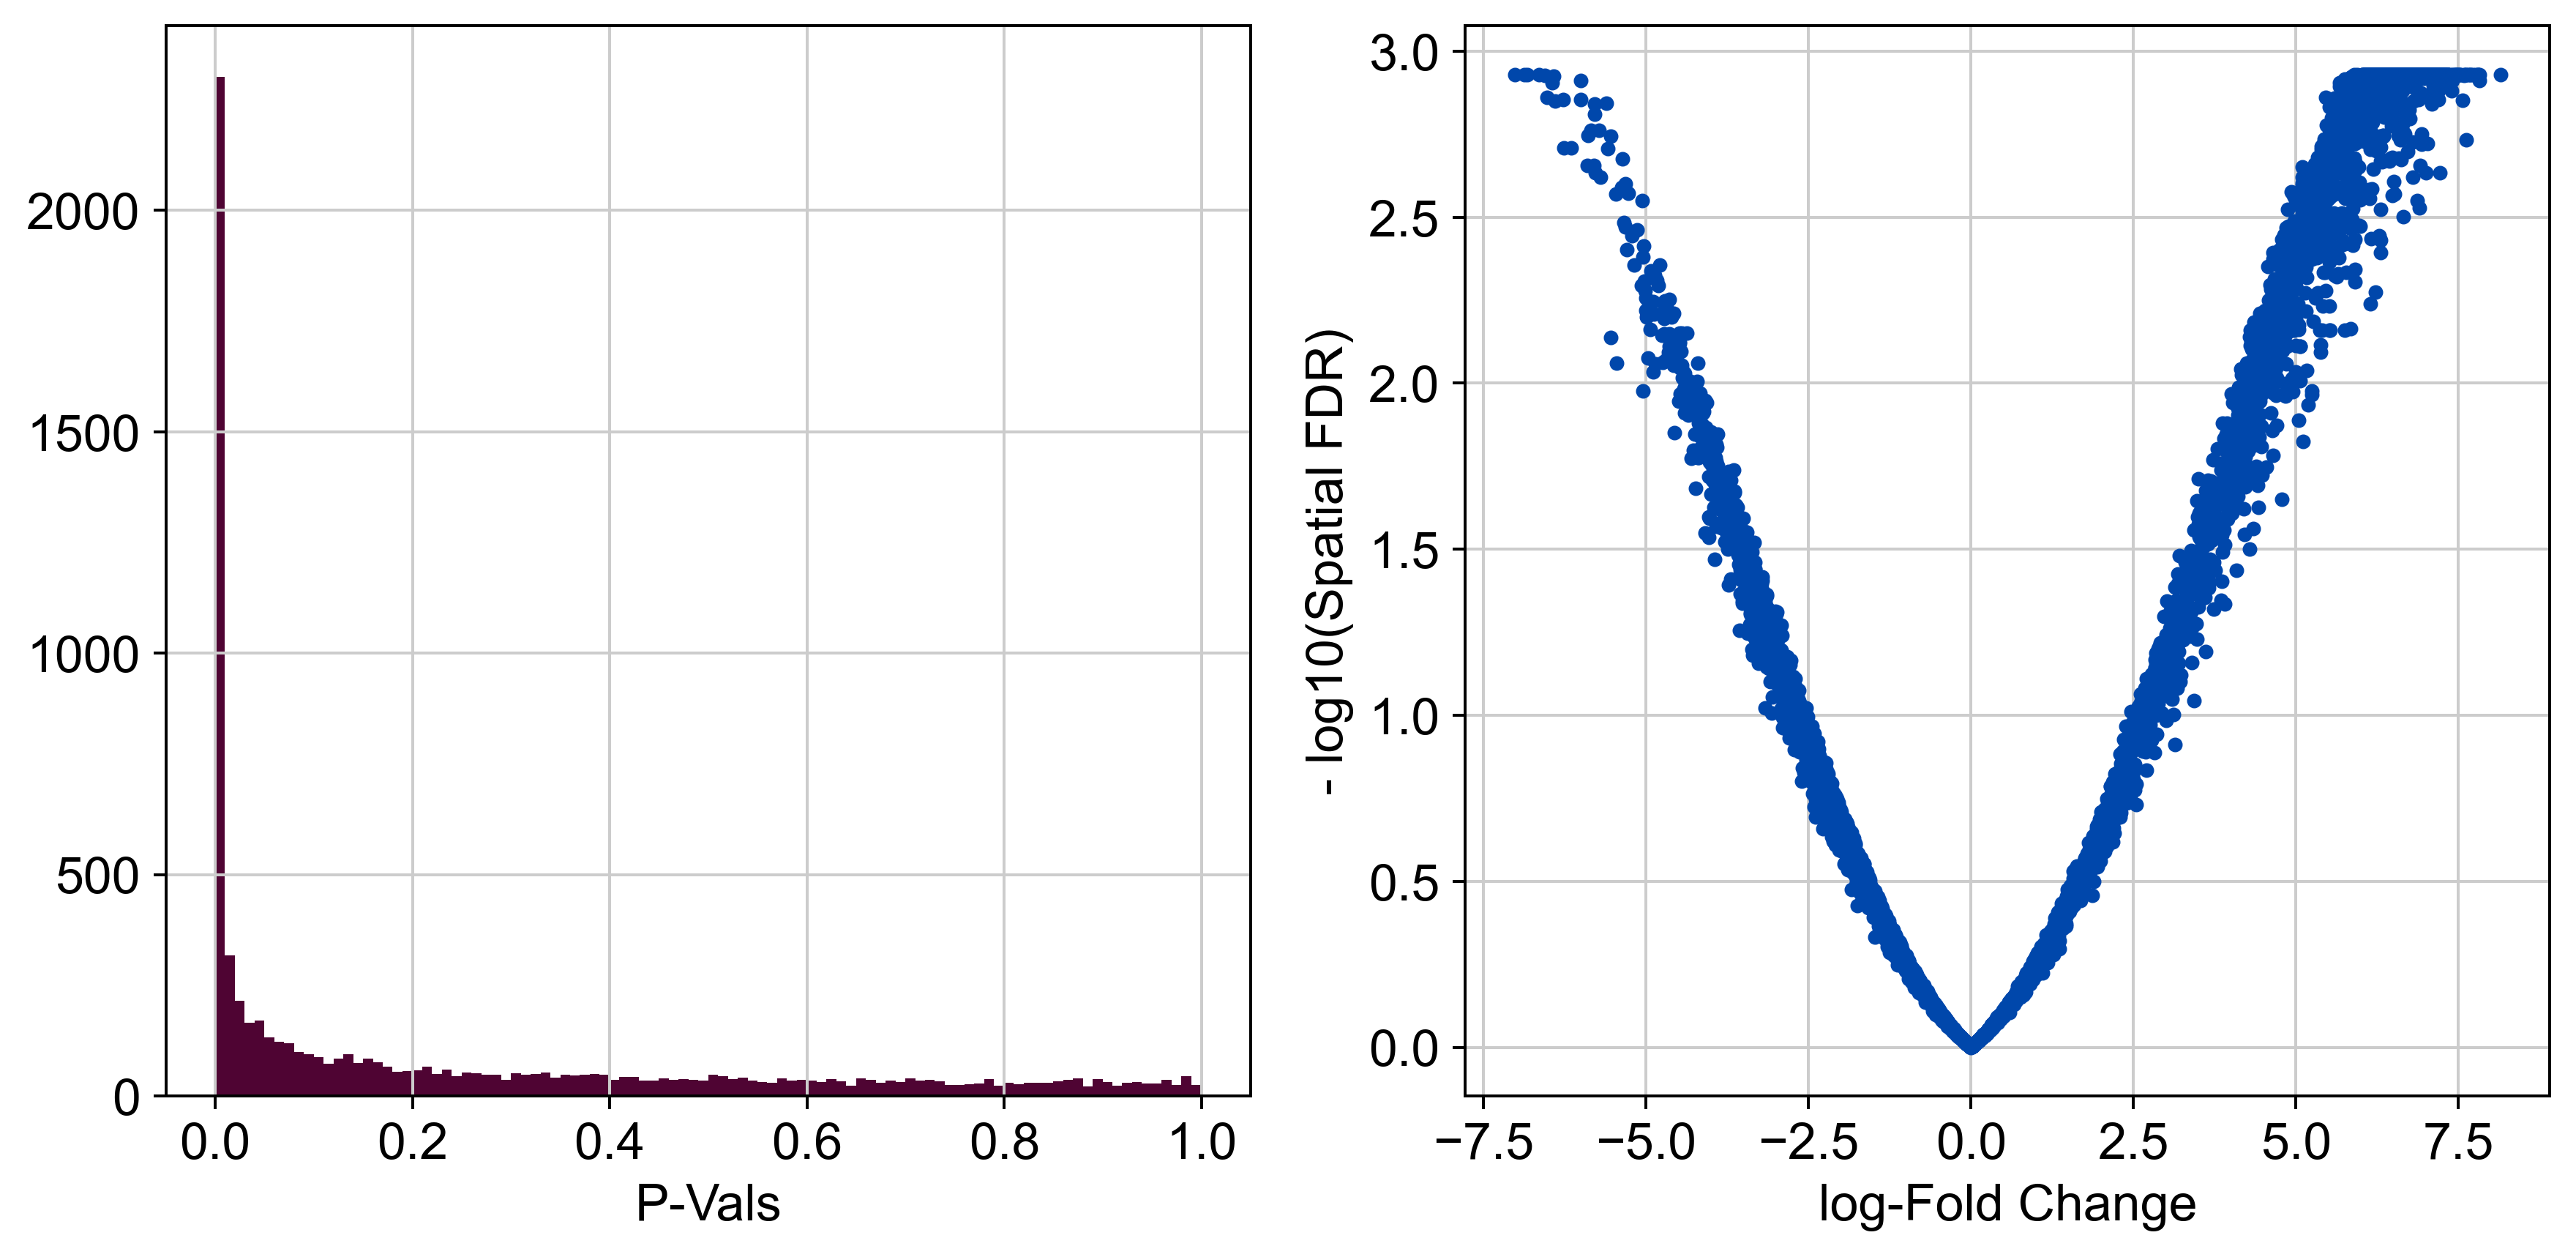

In [17]:
old_figsize = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [10,5]
plt.subplot(1,2,1)
plt.hist(adata.uns["nhood_adata"].obs.PValue, bins = 100, color = '#4F0433')
plt.xlabel("P-Vals");
plt.subplot(1,2,2)
plt.plot(adata.uns["nhood_adata"].obs.logFC, -np.log10(adata.uns["nhood_adata"].obs.SpatialFDR), '.', color = '#0047AB')
plt.xlabel("log-Fold Change")
plt.ylabel("- log10(Spatial FDR)")
plt.tight_layout()
plt.rcParams["figure.figsize"] = old_figsize

In [18]:
milo_results = adata.uns["nhood_adata"].obs
milo_results

,index_cell,kth_distance,SpatialFDR,logFC,logCPM,F,PValue,FDR
0,9737154-CSE_06_CRTL-V2,1.831161,0.062652,-3.055973,7.679673,5.406037,0.021045,0.059597
1,4595019-CSE_06_CRTL-V2,2.130541,0.362133,-1.470694,7.368995,1.522557,0.218645,0.355768
2,12541494-CSE_06_CRTL-V2,1.793364,0.002323,-5.783091,7.365784,13.211266,0.000354,0.002159
3,10046995-CSE_06_CRTL-V2,1.821095,0.001242,-6.440820,7.659629,15.421440,0.000118,0.001150
4,610996-CSE_06_CRTL-V2,2.212514,0.351126,-1.476155,7.353696,1.587239,0.209153,0.344815
...,...,...,...,...,...,...,...,...
7488,9020180-CSE03_IAV-V6,2.200487,0.001175,6.396988,7.488569,16.847751,0.000059,0.001081
7489,2665781-CSE03_IAV-V6,2.492664,0.006086,4.511912,7.246163,10.760232,0.001219,0.005671
7490,14041734-CSE03_IAV-V6,2.086828,0.001893,5.572980,7.801027,13.800136,0.000262,0.001758
7491,1631627-CSE03_IAV-V6,2.418929,0.009700,4.293691,7.763900,9.625893,0.002189,0.009055


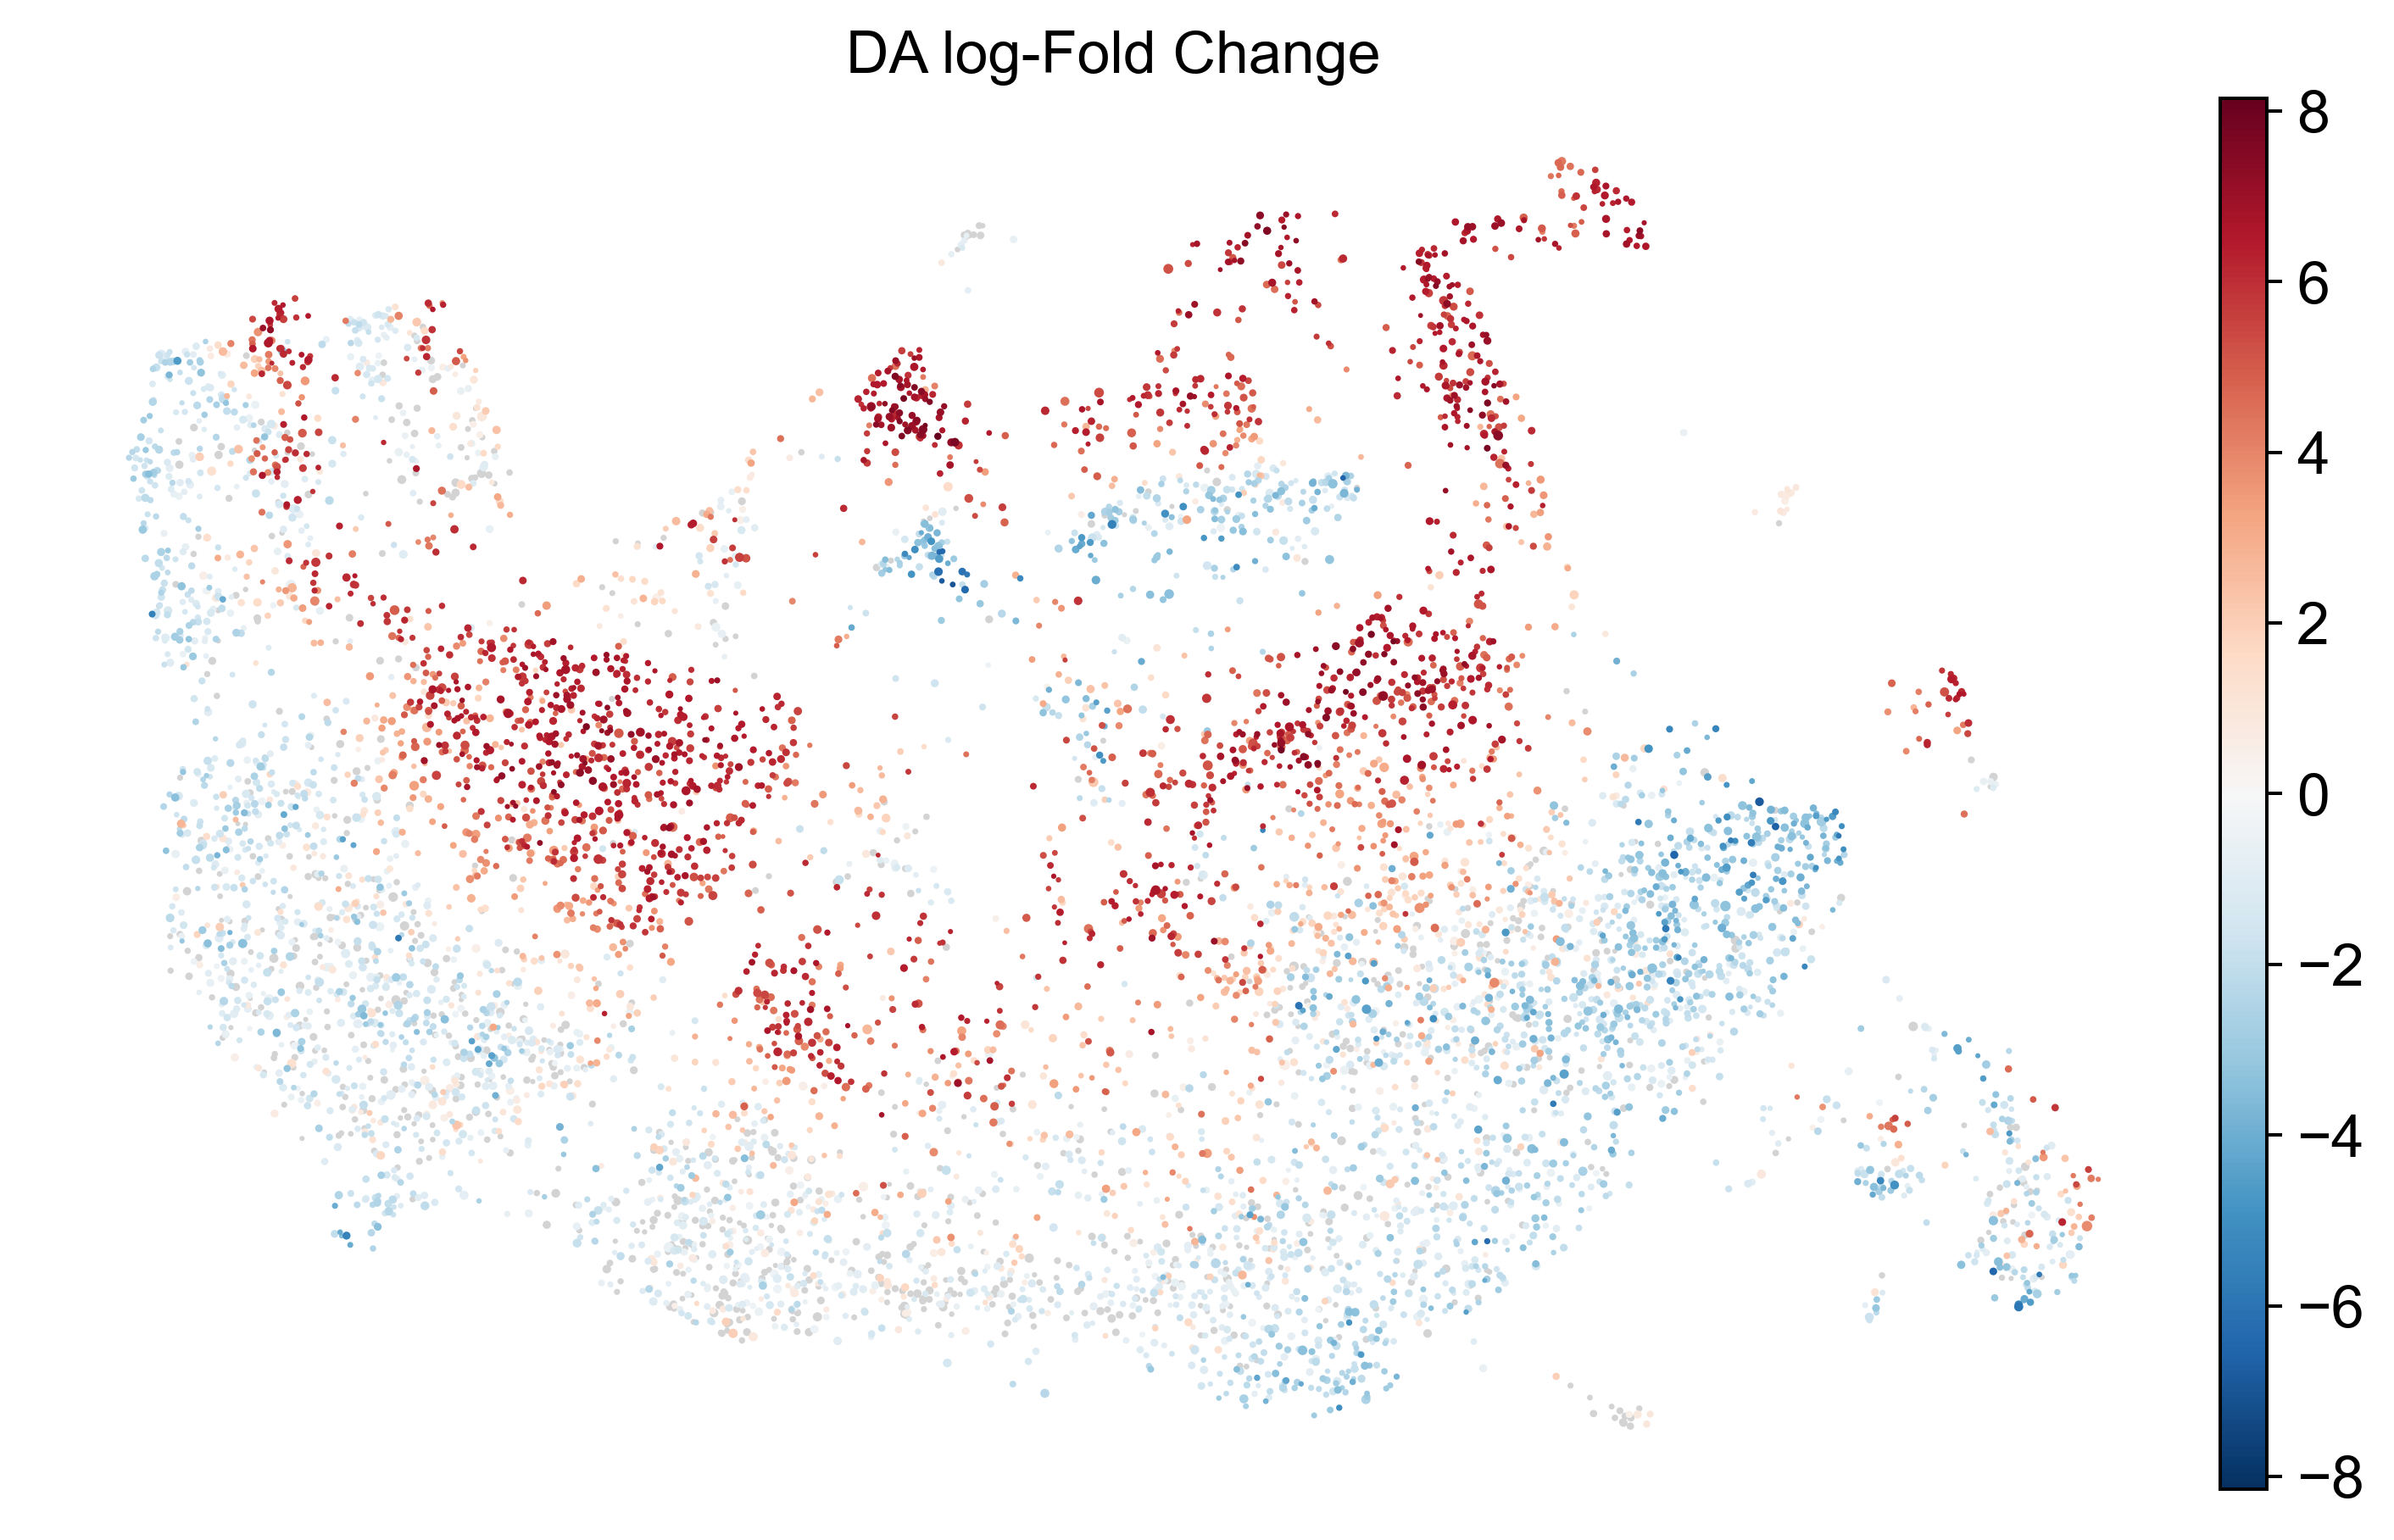

In [22]:
plt.rcParams["figure.figsize"] = [10,6]
milopy.utils.build_nhood_graph(adata)
milopy.plot.plot_nhood_graph(adata, alpha = 0.8, min_size = 0.1)

### Visualise results by cell type

In [23]:
milopy.utils.annotate_nhoods(adata, anno_col = 'cell_type')

Text(0.5, 0, 'celltype fraction')

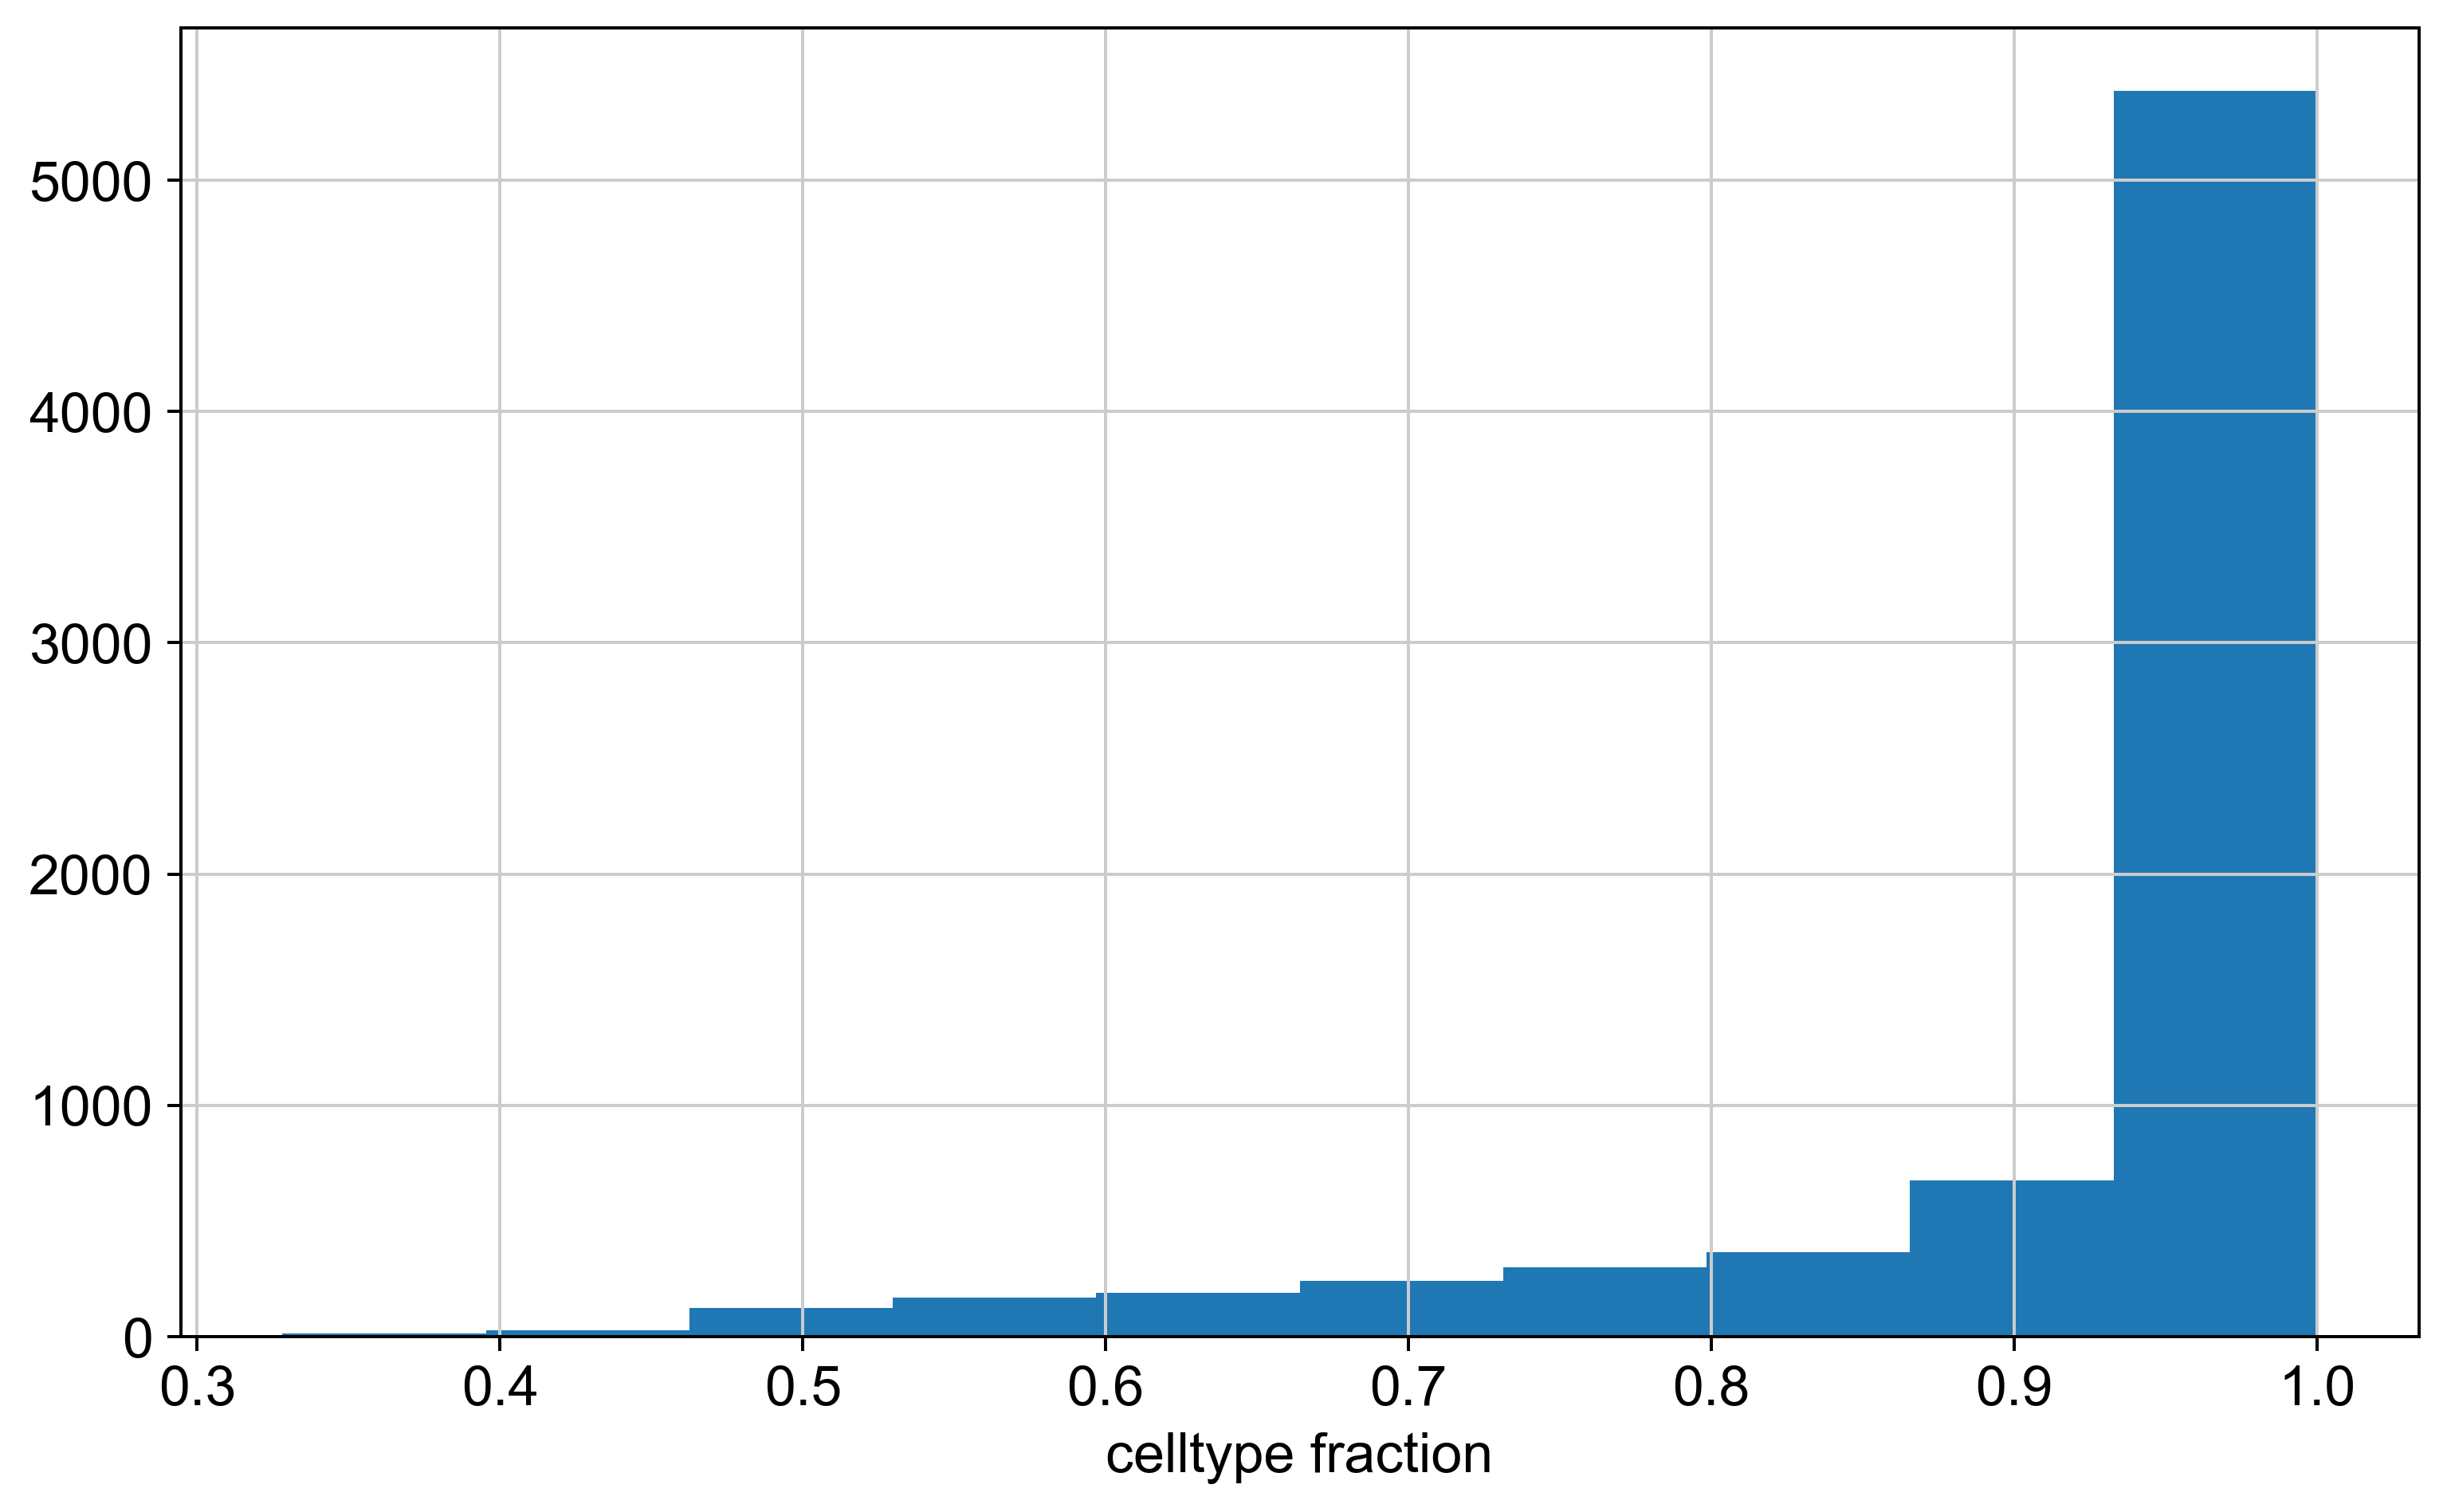

In [24]:
plt.hist(adata.uns['nhood_adata'].obs["nhood_annotation_frac"])
plt.xlabel("celltype fraction")

In [25]:
nhood_annotation = adata.uns['nhood_adata'].obs['nhood_annotation']
nhood_annotation = nhood_annotation.cat.add_categories(['Ambiguous'])
adata.uns['nhood_adata'].obs['nhood_annotation'] = nhood_annotation

adata.uns['nhood_adata'].obs.loc[adata.uns['nhood_adata'].obs["nhood_annotation_frac"] < 0.6, "nhood_annotation"] = "Ambiguous"


/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cartalop/mambaforge/envs/milopy/lib/python3.9/site-packages/sea

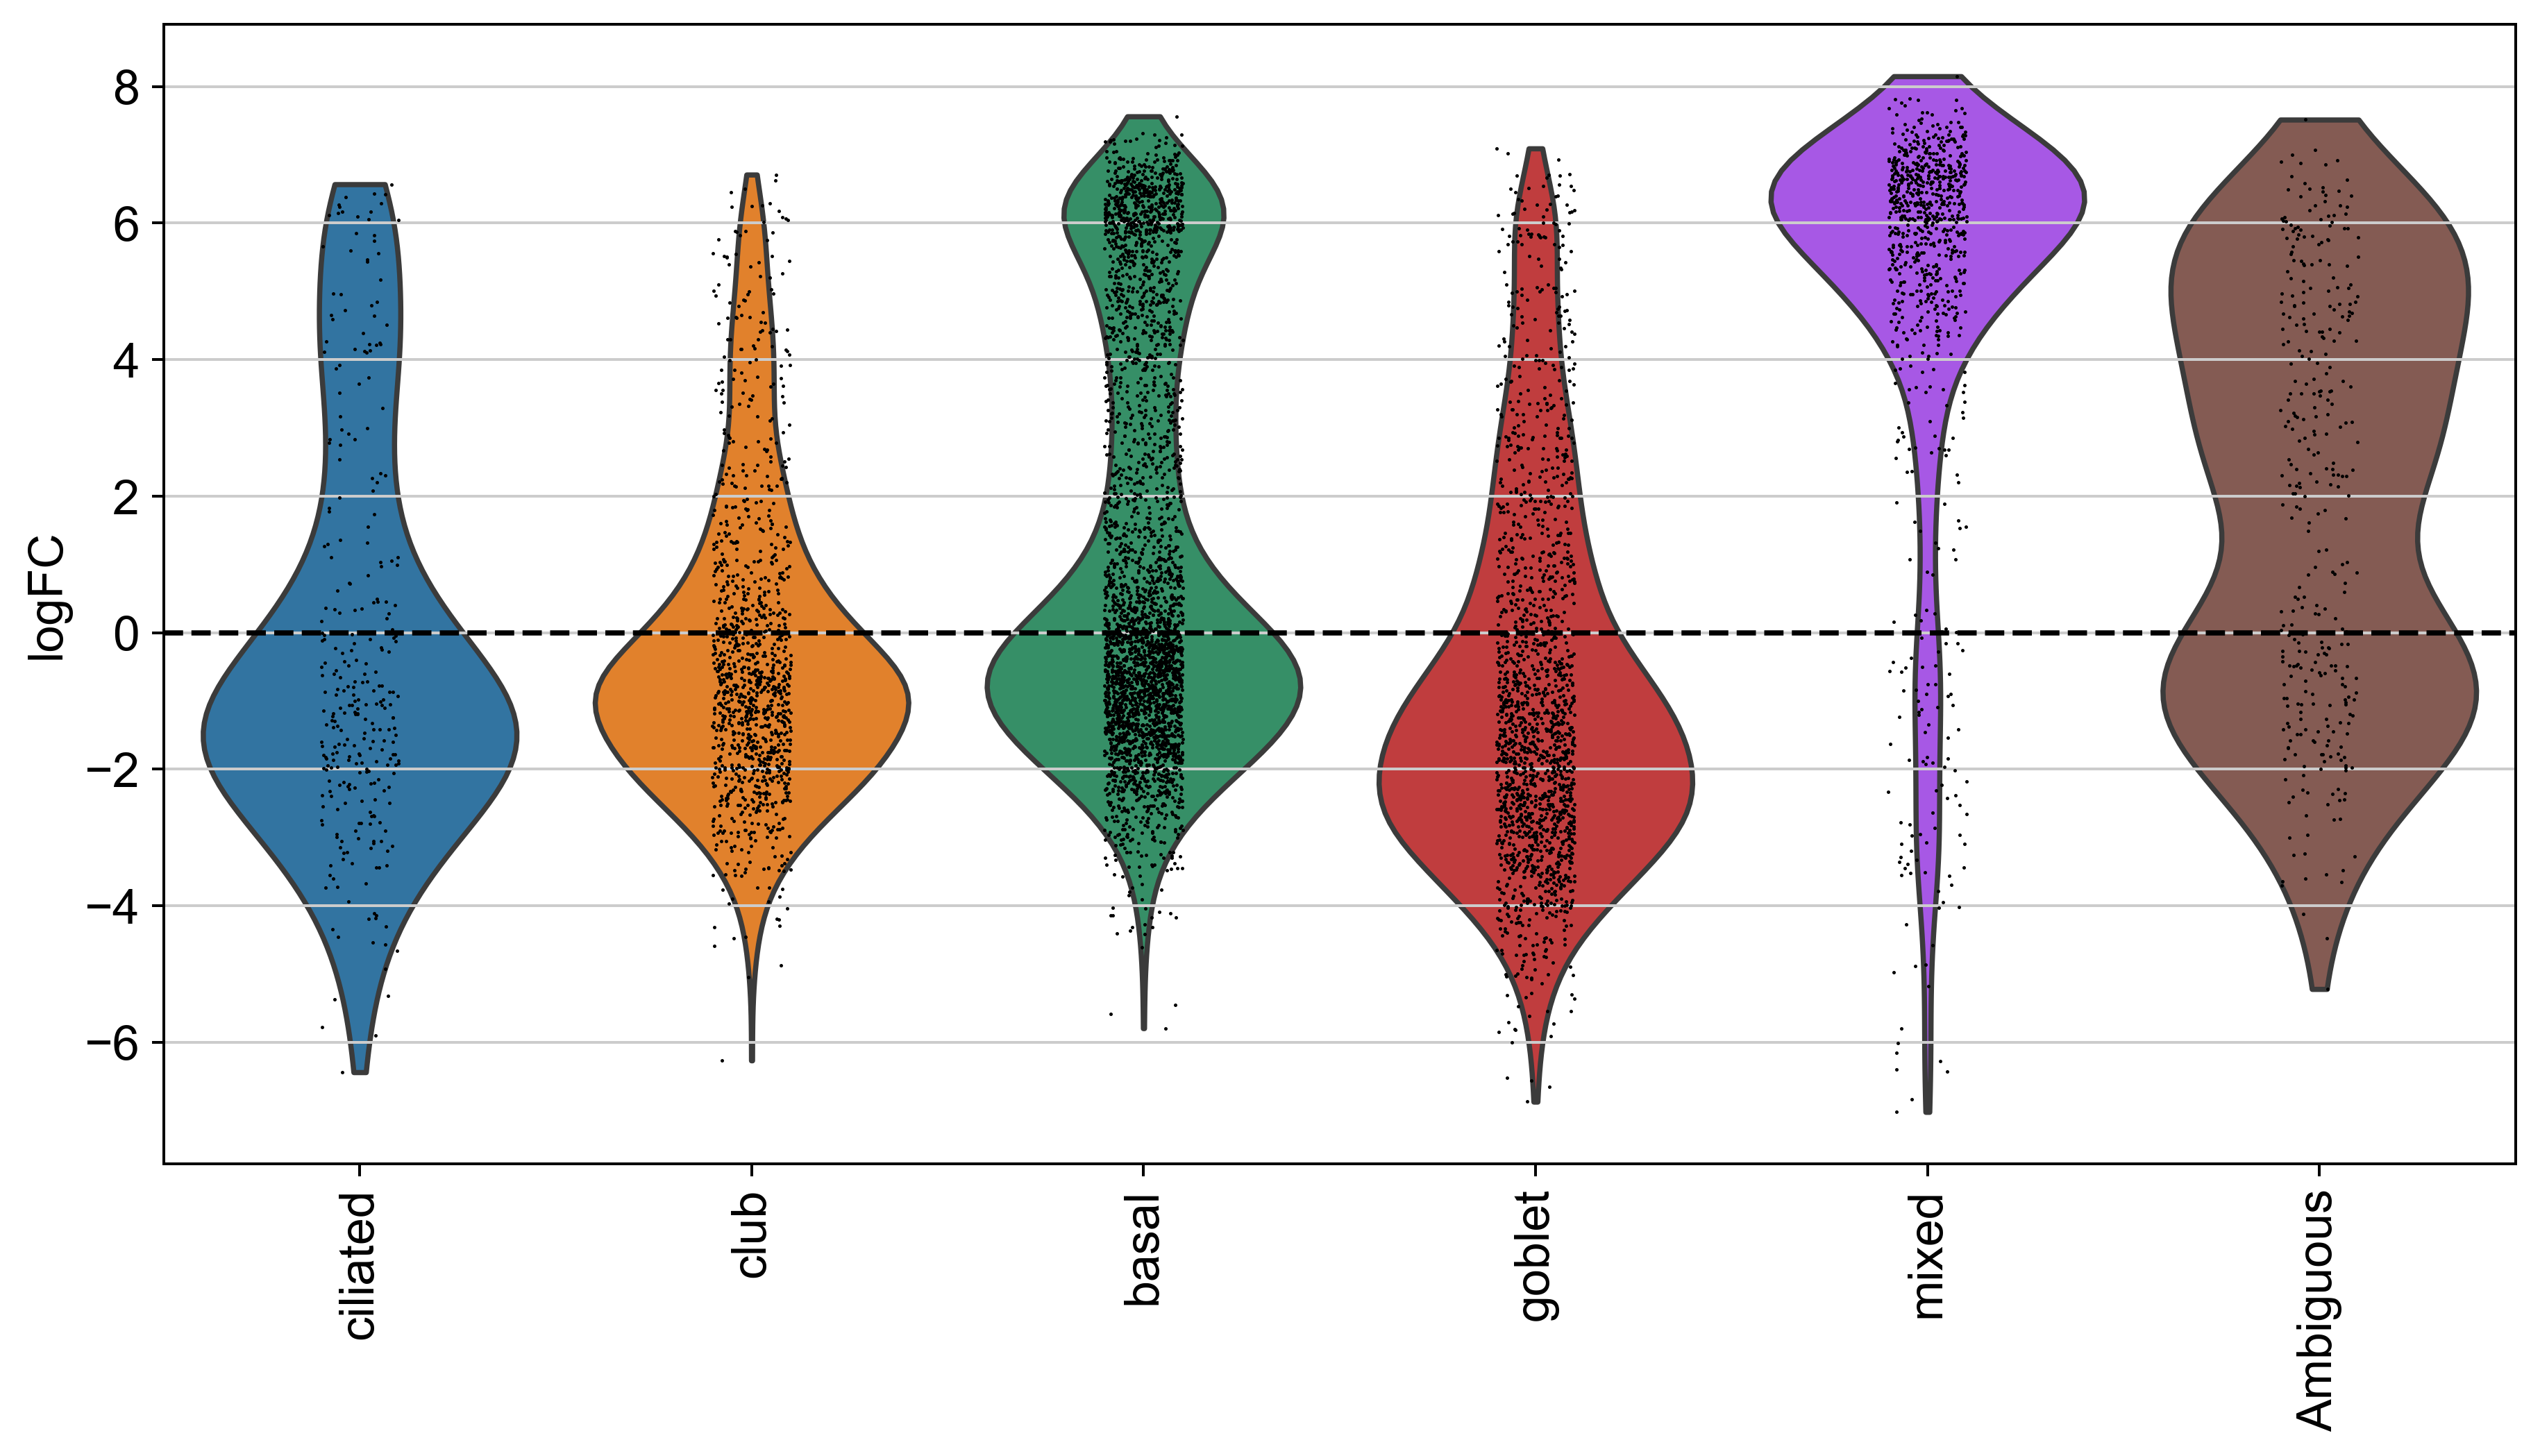

In [26]:
sc.pl.violin(adata.uns['nhood_adata'], "logFC", groupby = "nhood_annotation", rotation = 90, show = False);
plt.axhline(y = 0, color = 'black', linestyle = '--');
plt.show()